## Q1.

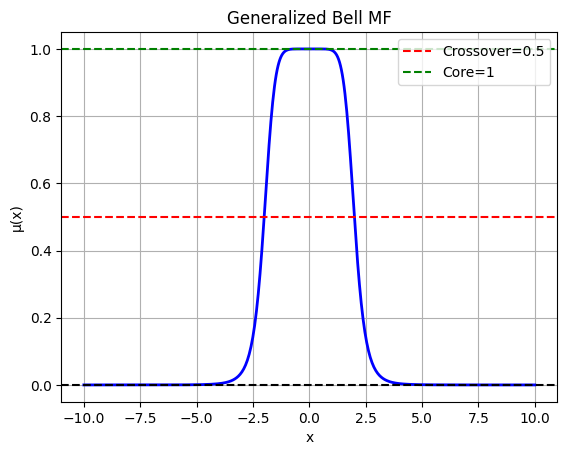

Core: [0]
Crossover points: []
Support (μ>0): [np.float64(-10.0), np.float64(10.0)]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generalized bell MF
def gbell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Parameters
a, b, c = 2, 4, 0
x = np.linspace(-10, 10, 500)
y = gbell_mf(x, a, b, c)

# Find core, crossover, support
core = [c]  # max at c
crossover_points = x[np.isclose(y, 0.5, atol=0.01)]

# Support: indices where μ(x) > 0 (with tolerance)
eps = 1e-6
support_indices = np.where(y > eps)[0]
support = [x[support_indices[0]], x[support_indices[-1]]]

# Plot
plt.plot(x, y, 'b', linewidth=2)
plt.axhline(0.5, color='r', linestyle='--', label="Crossover=0.5")
plt.axhline(0, color='k', linestyle='--')
plt.axhline(1, color='g', linestyle='--', label="Core=1")
plt.title("Generalized Bell MF")
plt.xlabel("x")
plt.ylabel("μ(x)")
plt.legend()
plt.grid()
plt.show()

print("Core:", core)
print("Crossover points:", crossover_points)
print("Support (μ>0):", support)



## Q2.

In [4]:
import numpy as np

# Relations
R1 = np.array([[1, 0.5, 0],
               [0.3, 0.4, 0],
               [0, 0.2, 1]])

R2 = np.array([[1, 0.2, 0],
               [0.7, 1, 0.3],
               [0, 0.7, 1]])

m, n = R1.shape[0], R2.shape[1]

# (a) MAX-MIN
R3_min = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        R3_min[i, j] = np.max(np.minimum(R1[i, :], R2[:, j]))

# (b) MAX-PRODUCT
R3_prod = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        R3_prod[i, j] = np.max(R1[i, :] * R2[:, j])

# (c) MAX-AVG
R3_avg = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        R3_avg[i, j] = np.max((R1[i, :] + R2[:, j]) / 2)

print("MAX-MIN Composition:\n", R3_min)
print("MAX-PRODUCT Composition:\n", R3_prod)
print("MAX-AVG Composition:\n",R3_avg)

MAX-MIN Composition:
 [[1.  0.5 0.3]
 [0.4 0.4 0.3]
 [0.2 0.7 1. ]]
MAX-PRODUCT Composition:
 [[1.   0.5  0.15]
 [0.3  0.4  0.12]
 [0.14 0.7  1.  ]]
MAX-AVG Composition:
 [[1.   0.75 0.5 ]
 [0.65 0.7  0.5 ]
 [0.5  0.85 1.  ]]


## Q3.

In [6]:
# Input (red fruit -> [0,0,1])
x = np.array([0, 0, 1])
R = np.array([[1, 0.5, 0.3],
              [0.7, 1, 0.4],
              [0.2, 0.7, 1]])

# Zadeh inference
y = np.zeros(R.shape[1])
for j in range(R.shape[1]):
    y[j] = np.max(np.minimum(x, R[:, j]))

print("Inferred Taste (sour, sweet-sour,sweet):",y)

Inferred Taste (sour, sweet-sour,sweet): [0.2 0.7 1. ]
